In [11]:
#Let's import some packages including TensorFlow (which has Keras as a subset)
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

print(tf.__version__)

#let's check if we see a GPU:
tf.test.gpu_device_name()
tf.test.is_gpu_available()

1.8.0


False

In [2]:
#Let's load the MNIST data:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [3]:
#Convert to one hot encoding 
print("(Example) target:",y_train[0])
y_test=tf.keras.utils.to_categorical(y_test)
y_train=tf.keras.utils.to_categorical(y_train)
print("(Example) target after one hot encoding:",y_train[0])
x_train, x_test = x_train / 255.0, x_test / 255.0

(Example) target: 5
(Example) target after one hot encoding: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


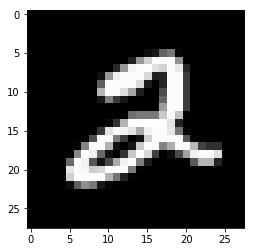

In [4]:
# Read number of samples and dimensions of images
numsamples,nx,ny=np.shape(x_train)
plt.imshow(x_train[5,:,:],cmap='gray') #What does that do?

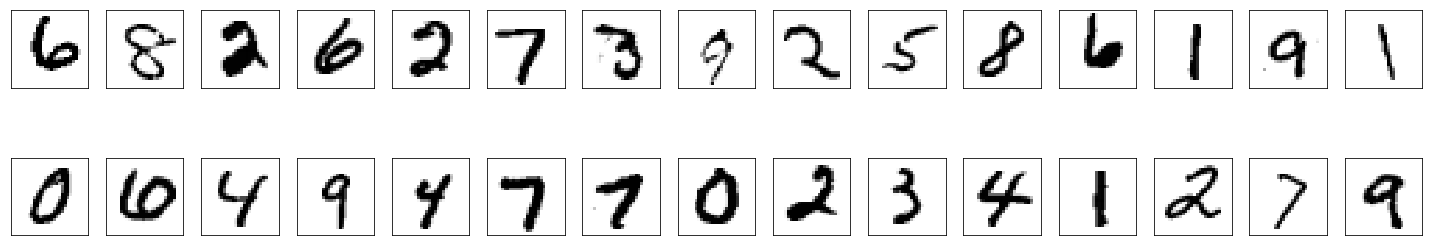

In [5]:
# Next, let's plot a few example images
plt.figure(figsize=(20,5))
for i in range(30):
    fig = plt.subplot(2, 15, i + 1)
    index=np.random.randint(numsamples)
    fig.imshow(x_train[index,:,:],cmap='binary') 
    fig.set_xticks(())
    fig.set_yticks(())

plt.tight_layout()
plt.savefig('MNIST.png')

#Can you identify all characters?

In [ ]:
# Let's set up a model, consisting of:

# a flatten layer, which "flattens" the 28 x 28 pixels into 784 pixels, then
# connect it densely to 512 nodes;
# these nodes are densely connected to 10 softmax nodes!

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [ ]:
# Next we configure the model, i.e. which optimizer, loss, and metric (for displaying performance) 
model.compile(optimizer=tf.train.GradientDescentOptimizer(0.001), 
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

'''
- Loss function —This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.
- Optimizer —This is how the model is updated based on the data it sees and its loss function.
- Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.
'''
out=model.fit(x_train, y_train, epochs=5)

train_loss, train_acc =model.evaluate(x_train, y_train)
print('Training accuracy:', train_acc)

test_loss, test_acc =model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

In [ ]:
# model.fit returns a history object, here is how we can use it to plot the learning curve

plt.subplot(211)
plt.plot(range(len(out.history['acc'])),out.history['acc'])
plt.xticks(range(len(out.history['acc'])))
#plt.xlabel('Trainings batch')
plt.ylabel('Accuracy')

plt.subplot(212)
plt.plot(range(len(out.history['acc'])),out.history['loss'])
plt.xticks(range(len(out.history['acc'])))
plt.xlabel('Trainings batch')
plt.ylabel('Loss')

In [6]:
# Let's built a convolutional network that achieves > 99% accuracy!
# This is based on: http://adventuresinmachinelearning.com/keras-tutorial-cnn-11-lines/

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(tf.keras.layers.Conv2D(64, (5, 5), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1000, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [8]:
# The Conv net expects a 4 tensor, which is why we rearrange the data.
x_train=x_train.reshape(numsamples,28,28,1)
x_test=x_test.reshape(np.shape(x_test)[0],28,28,1)

model.compile(optimizer=tf.train.GradientDescentOptimizer(0.01), 
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

out=model.fit(x_train, y_train, epochs=10)

train_loss, train_acc =model.evaluate(x_train, y_train)
print('Training accuracy:', train_acc)

test_loss, test_acc =model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/10
 8576/60000 [===>..........................] - ETA: 1:16 - loss: 0.5313 - acc: 0.8405

KeyboardInterrupt: 

In [9]:
# Training with Adam optimizer is even faster... Adam is a first-order gradient-based optimization of
# stochastic objective functions, paper: https://arxiv.org/abs/1412.6980

model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

out=model.fit(x_train, y_train, epochs=3)

print('Done training, evaluating network..')
train_loss, train_acc =model.evaluate(x_train, y_train)
print('Training accuracy:', train_acc)

test_loss, test_acc =model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/3
60000/60000 [==============================] - 94s 2ms/step - loss: 0.1130 - acc: 0.9670
Epoch 2/3
60000/60000 [==============================] - 90s 2ms/step - loss: 0.0389 - acc: 0.9878
Epoch 3/3
60000/60000 [==============================] - 96s 2ms/step - loss: 0.0281 - acc: 0.9911
Done training, evaluating network..
60000/60000 [==============================] - 33s 551us/step
Training accuracy: 0.9939333333333333
10000/10000 [==============================] - 5s 460us/step
Test accuracy: 0.9906


In [ ]:
# And on to Fashion MNIST... 
#Source: https://www.tensorflow.org/tutorials/keras/basic_classification
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#Scale values to unit range:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
# Display a few examples from this data set
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [ ]:
# Let's set up a sequential model, consisting of:
# a flatten layer, the resulting 784 pixels are densely connected to 128 nodes;
# these nodes are densely connected to 10 softmax nodes!
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [ ]:
# Next we choose which optimizer, loss, and metric (for displaying performance)
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Now train:
model.fit(train_images, train_labels, epochs=5)



In [ ]:
# and evaluate on train and test set...

train_loss, train_acc =model.evaluate(train_images, train_labels)
print('Training accuracy:', train_acc)
test_loss, test_acc =model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)
# Predict labels for all test images
predictions = model.predict(test_images)

In [ ]:
# Make some auxiliary functions for displaying predictions and examples:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [ ]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)